In [27]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Loading pre-trained word vectors and storing them in a vector index and finding similar words later Visualizing them

In [28]:
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip
    

--2024-06-27 04:19:59--  https://dl.fbaipublicfiles.com/fasttext/vectors-english/wiki-news-300d-1M.vec.zip
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 13.227.219.10, 13.227.219.33, 13.227.219.70, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|13.227.219.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 681808098 (650M) [application/zip]
Saving to: 'wiki-news-300d-1M.vec.zip.2'

wiki-news-300d-1M.v 100%[===================>] 650.22M   281MB/s    in 2.3s    

2024-06-27 04:20:01 (281 MB/s) - 'wiki-news-300d-1M.vec.zip.2' saved [681808098/681808098]



In [ ]:
!unzip /kaggle/working/wiki-news-300d-1M.vec.zip

In [30]:
!head /kaggle/working/wiki-news-300d-1M.vec

999994 300
, 0.1073 0.0089 0.0006 0.0055 -0.0646 -0.0600 0.0450 -0.0133 -0.0357 0.0430 -0.0356 -0.0032 0.0073 -0.0001 0.0258 -0.0166 0.0075 0.0686 0.0392 0.0753 0.0115 -0.0087 0.0421 0.0265 -0.0601 0.2420 0.0199 -0.0739 -0.0031 -0.0263 -0.0062 0.0168 -0.0357 -0.0249 0.0190 -0.0184 -0.0537 0.1420 0.0600 0.0226 -0.0038 -0.0675 -0.0036 -0.0080 0.0570 0.0208 0.0223 -0.0256 -0.0153 0.0022 -0.0482 0.0131 -0.6016 -0.0088 0.0106 0.0229 0.0336 0.0071 0.0887 0.0237 -0.0290 -0.0405 -0.0125 0.0147 0.0475 0.0647 0.0474 0.0199 0.0408 0.0322 0.0036 0.0350 -0.0723 -0.0305 0.0184 -0.0026 0.0240 -0.0160 -0.0308 0.0434 0.0147 -0.0457 -0.0267 -0.1703 -0.0099 0.0417 0.0235 -0.0260 -0.1519 -0.0116 -0.0306 -0.0413 0.0330 0.0723 0.0365 -0.0001 0.0042 0.0346 0.0277 -0.0305 0.0784 -0.0404 0.0187 -0.0225 -0.0206 -0.0179 -0.2428 0.0669 0.0523 0.0527 0.0149 -0.0708 -0.0987 0.0263 -0.0611 0.0302 0.0216 0.0313 -0.0140 -0.2495 -0.0346 -0.0480 0.0250 0.2130 -0.0330 -0.1553 -0.0292 -0.0346 0.1074 0.0010 -0.0117 -0.0057

In [31]:
import os

file_path='/kaggle/working/wiki-news-300d-1M.vec'

try:
    with open(file_path,'r',encoding='utf-8') as file:
            first_line=file.readline()
            print("First line(metadata):",first_line)
            word_vectors=dict()
            for line in file:
                parts = line.strip().split()
                word =parts[0]
                embedding_vector=list(map(float,parts[1:]))
                word_vectors[word] = embedding_vector
            print("File read successfully and the wrod vectors stored in tthe dictionary.")
            for word,vector in list(word_vectors.items())[:5]:
                print(f"Word :{word},Vector: {vector}")
        

except Exception as e:
        print(f"An error has occurred:{e}")
            
            

First line(metadata): 999994 300

File read successfully and the wrod vectors stored in tthe dictionary.
Word :,,Vector: [0.1073, 0.0089, 0.0006, 0.0055, -0.0646, -0.06, 0.045, -0.0133, -0.0357, 0.043, -0.0356, -0.0032, 0.0073, -0.0001, 0.0258, -0.0166, 0.0075, 0.0686, 0.0392, 0.0753, 0.0115, -0.0087, 0.0421, 0.0265, -0.0601, 0.242, 0.0199, -0.0739, -0.0031, -0.0263, -0.0062, 0.0168, -0.0357, -0.0249, 0.019, -0.0184, -0.0537, 0.142, 0.06, 0.0226, -0.0038, -0.0675, -0.0036, -0.008, 0.057, 0.0208, 0.0223, -0.0256, -0.0153, 0.0022, -0.0482, 0.0131, -0.6016, -0.0088, 0.0106, 0.0229, 0.0336, 0.0071, 0.0887, 0.0237, -0.029, -0.0405, -0.0125, 0.0147, 0.0475, 0.0647, 0.0474, 0.0199, 0.0408, 0.0322, 0.0036, 0.035, -0.0723, -0.0305, 0.0184, -0.0026, 0.024, -0.016, -0.0308, 0.0434, 0.0147, -0.0457, -0.0267, -0.1703, -0.0099, 0.0417, 0.0235, -0.026, -0.1519, -0.0116, -0.0306, -0.0413, 0.033, 0.0723, 0.0365, -0.0001, 0.0042, 0.0346, 0.0277, -0.0305, 0.0784, -0.0404, 0.0187, -0.0225, -0.0206, -0.017

In [32]:
word_vectors['University']

[-0.0757,
 -0.0538,
 0.0765,
 -0.0919,
 0.0397,
 0.1135,
 -0.0947,
 0.0419,
 0.1382,
 0.0717,
 -0.0758,
 0.0224,
 0.0169,
 -0.1556,
 -0.0458,
 0.0045,
 0.0579,
 -0.1295,
 0.0546,
 -0.0467,
 -0.0322,
 0.0202,
 0.1052,
 0.175,
 0.1136,
 -0.0361,
 0.0094,
 0.157,
 0.0471,
 0.0939,
 -0.0879,
 0.1764,
 0.096,
 -0.0064,
 0.0296,
 0.0548,
 0.0758,
 -0.0562,
 -0.052,
 0.0626,
 -0.072,
 -0.0289,
 -0.1558,
 0.0063,
 -0.0152,
 -0.0123,
 0.0525,
 0.004,
 0.0446,
 0.14,
 -0.0377,
 0.0809,
 -0.688,
 0.079,
 0.1502,
 0.013,
 -0.0493,
 0.009,
 0.0869,
 0.054,
 -0.1006,
 0.0459,
 -0.0929,
 0.013,
 -0.0956,
 0.0696,
 0.0503,
 0.0582,
 0.035,
 0.0044,
 -0.2247,
 0.0546,
 -0.0314,
 -0.0693,
 -0.045,
 0.1788,
 0.0666,
 -0.0105,
 0.0493,
 0.02,
 0.0128,
 0.1076,
 -0.0311,
 -0.0832,
 -0.0265,
 -0.052,
 0.0481,
 -0.0449,
 0.1752,
 0.0508,
 -0.0226,
 -0.0238,
 0.0925,
 0.0637,
 0.1002,
 0.0401,
 0.1304,
 -0.1165,
 -0.0185,
 0.1062,
 -0.1707,
 0.0284,
 -0.0315,
 0.026,
 -0.0571,
 -0.0397,
 -0.2486,
 0.0582,
 0.

In [33]:
import numpy as np
from numpy.linalg import norm

w1=np.array(word_vectors['college'])
w2=np.array(word_vectors['university'])
w3=np.array(word_vectors['office'])

w1_w2_cosine = np.dot(w1,w2)/(norm(w1)*norm(w2))
print("Cosine similarity between college and office is:",w1_w2_cosine)
w1_w3_cosine = np.dot(w1,w3)/(norm(w1)*norm(w3))
print("Cosine similarity between college and office is:",w1_w3_cosine)

Cosine similarity between college and office is: 0.7941901894056825
Cosine similarity between college and office is: 0.49781446402086993


In [34]:
similarity_values=dict()
query_vec= word_vectors['college']

for word, vector in word_vectors.items():
    similarity_values[word] = np.dot(query_vec, vector)/(norm(query_vec)*norm(vector))

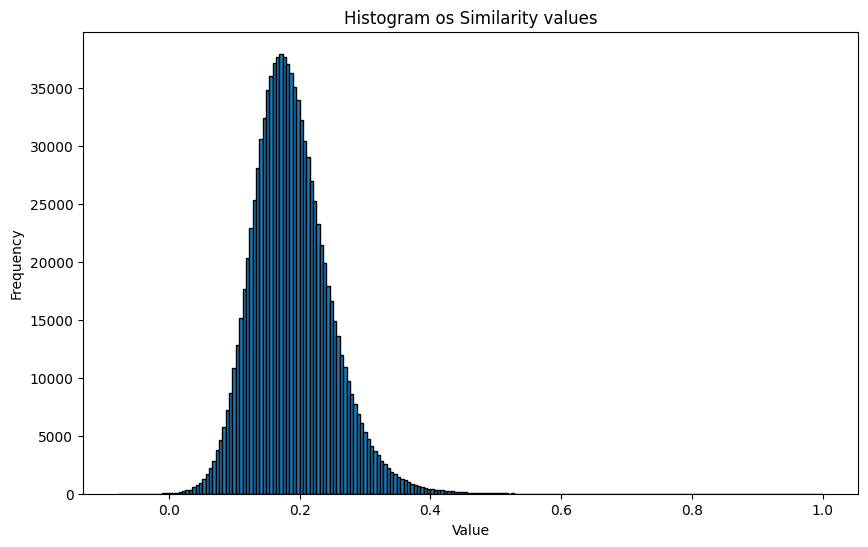

In [35]:
import matplotlib.pyplot as plt

values = list(similarity_values.values())
plt.figure(figsize=(10,6))
plt.hist(values, bins=210
         , edgecolor='black')
plt.title('Histogram os Similarity values')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.show()

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from numpy.linalg import norm

def find_top_similar_words(query_word, word_vectors,top_k = 50):
    similarity_values = dict()
    query_vec = word_vectors[query_word]
    
    for word, vector in word_vectors.items():
        similarity_values[word] = np.dot(query_vec,vector) / (norm(query_vec) *  norm(vector))
    
    sorted_words = sorted(similarity_values.items(),key=lambda x:x[1], reverse=True)
    return sorted_words[1:(top_k+1)]


In [37]:
query_word = 'boat'
similar_words = find_top_similar_words(query_word, word_vectors, 100)

In [41]:
word = query_word
arrays = np.empty((0,300), dtype='f')

word_labels=  [word]
color_list = ['red']
arrays = np.append(arrays, [word_vectors[word]], axis=0)
for wrd in similar_words[:100]:
    wrd_vector = word_vectors[wrd[0]]
    word_labels.append(wrd[0])
    color_list.append('blue')
    arrays = np.append(arrays, [wrd_vector], axis=0)

In [42]:
arrays.shape

(101, 300)

In [44]:
reduc = PCA(n_components=50).fit_transform(arrays)

In [46]:
np.set_printoptions(suppress=True)
Y = TSNE(n_components=2, random_state=0, perplexity=5, learning_rate=200).fit_transform(reduc)
df = pd.DataFrame({
    'x': [x for x in Y[:,0]],
    'y': [y for y in Y[:,1]],
    'words':word_labels,
    'color':color_list
})

In [49]:
df_sample = df.head(10)
df_sample

,x,y,words,color
0,102.038864,57.900879,boat,red
1,119.464310,54.965286,boats,blue
2,161.269806,74.524475,Boat,blue
3,216.474976,38.725155,yacht,blue
4,-117.405861,-260.348694,canoe,blue
5,-114.384010,226.987625,sailboat,blue
6,77.497787,39.029469,dinghy,blue
7,33.838478,125.203407,ship,blue
8,125.256699,-26.595379,vessel,blue
9,250.040100,-150.248154,kayak,blue


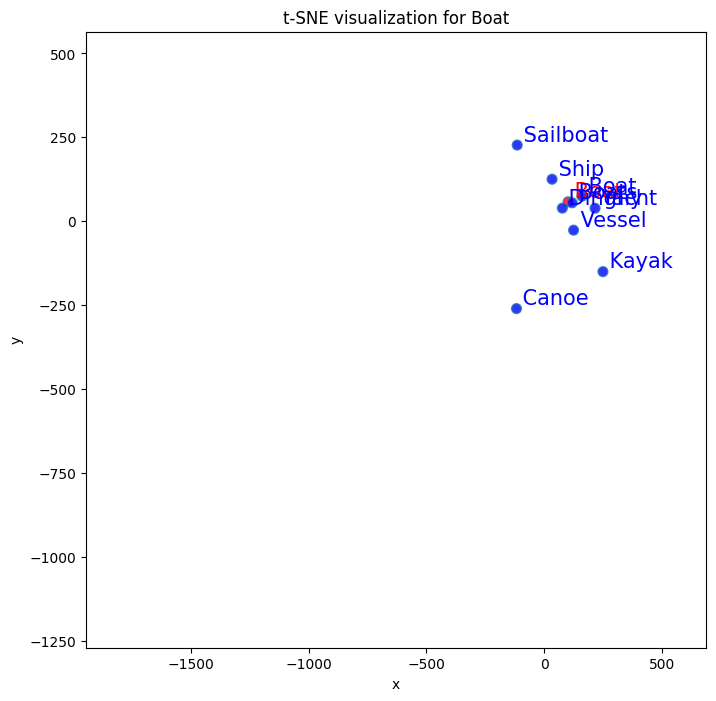

In [55]:
fig, _ =plt.subplots()
fig.set_size_inches(8,8)
p1 = sns.regplot(data=df_sample,x="x",y="y",fit_reg=False,marker='o',scatter_kws={'s':50,'facecolors':df_sample['color']})

for line in range(0,df_sample.shape[0]):
    p1.text(df_sample["x"][line],df_sample['y'][line],' ' + df["words"][line].title(),horizontalalignment='left',verticalalignment='bottom',size='medium',color=df_sample['color'][line],weight='normal').set_size(15)

plt.xlim(Y[:,0].min()-50, Y[:,0].max()+50)
plt.ylim(Y[:,1].min()-50, Y[:,1].max()+50)
plt.title('t-SNE visualization for {}'.format(word.title()))
plt.show()

# Annoy being used to create a vector index for enabling fast vector search


In [56]:
!pip install annoy

In [59]:
from annoy import AnnoyIndex
f = 300
t = AnnoyIndex(f , 'angular')
index_to_word = dict()
index_value = 0  

for word, vector in word_vectors.items():
    t.add_item(index_value, vector)
    index_to_word[index_value]=word
    index_value=index_value+1
t.build(50)
t.save('word_embeddings.ann')

True

In [60]:
u = AnnoyIndex(f, 'angular')
u.load('/kaggle/working/word_embeddings.ann')

True

In [61]:
query_word = "statistics"
n = 10
v = word_vectors[query_word]
res_in = u.get_nns_by_vector(v, n, search_k=-1,include_distances=True)
item_indexes, distances = res_in

In [63]:
print("Words similar to query_word:", query_word)
print('---------------------')
for i in range(len(item_indexes)):
    idx = item_indexes[i]
    print("word:",index_to_word[idx]," is at a distance of:",distances[i], " or similarity of:",1-distances[i])

Words similar to query_word: statistics
---------------------
word: statistics  is at a distance of: 0.0  or similarity of: 1.0
word: stats  is at a distance of: 0.637666642665863  or similarity of: 0.36233335733413696
word: data  is at a distance of: 0.8113470673561096  or similarity of: 0.18865293264389038
word: stat  is at a distance of: 0.854632556438446  or similarity of: 0.14536744356155396
word: figures  is at a distance of: 0.8640503287315369  or similarity of: 0.13594967126846313
word: percentages  is at a distance of: 0.8983590006828308  or similarity of: 0.10164099931716919
word: numbers  is at a distance of: 0.9014903903007507  or similarity of: 0.09850960969924927
word: totals  is at a distance of: 0.9024370908737183  or similarity of: 0.09756290912628174
word: demographics  is at a distance of: 0.9026355743408203  or similarity of: 0.09736442565917969
word: averages  is at a distance of: 0.9271734356880188  or similarity of: 0.0728265643119812
